In [3]:
from IPython.display import YouTubeVideo
import pickle
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import numpy as np
import pylab as pl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# sample non-linearly separable dataset (-2-)
X, y, frac0, frac1 = pickle.load(open("data/kernel_dataset.p", 'rU'))

In [5]:
# split data into train and test sets (-2-)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# The Problem
"I want to use a classification algorithm (SVM or Logistic regression) on non-linearly separable data."

## Background
In some situations, it's not possible to linearly separate your groups of data. This can be handled two ways:
1. Use linear separation with a penalty for mis-classified cases (only works when data has some linear component).
2. Use "a kernel function (non-linear) to *map* the data into a *different space*" in order to make it possible to perform the linear separation. (-1-)
  - The kernel trick: A linear learning machine learns a non-linear function in a high-dimensional feature space.

## How it works
1. Without kernels, the SVM will simply create an N-1 dimensional separation hyperplane for an N-dimensional dataset.
2. We want to be able to create a non-linear decision boundary in the original feature space - what if we could change N?
![title](extras/eric-kim-graphs.png)
(-2-)
2. The kernel function "computes a dot product between two vectors (e.g. a measure of 'similarity')" to transform the dimensionality of the non-linear original data. (-2-)
3. The linear SVM is then run on the now linearly separable data. This decision boundary, when mapped back to the original space, is non-linear.
![test](extras/eric-kim-graphs2.png)
(-2-)

In [4]:
# visualization of SVM with a polynomial kernel (-3-)
#YouTubeVideo('3liCbRZPrZA') #Run this line in Jupyter, does not load in GitHub

<a href="http://www.youtube.com/watch?feature=player_embedded&v=3liCbRZPrZA" target="_blank"><img src="http://img.youtube.com/vi/3liCbRZPrZA/0.jpg" 
alt="Visualization of SVM with a polynomial kernel" width="240" height="180" border="10" align="left" /></a>

In [5]:
# visualization of SVM with a rbf kernel (-6-)
#YouTubeVideo('9NrALgHFwTo') #Run this line in Jupyter, does not load in GitHub

<a href="http://www.youtube.com/watch?feature=player_embedded&v=9NrALgHFwTo" target="_blank"><img src="http://img.youtube.com/vi/9NrALgHFwTo/0.jpg" 
alt="Visualization of SVM with a rbf kernel" width="240" height="180" border="10" align="left" /></a>

4. It's important to optimize the kernel parameters. A popular way of doing this is with K-Fold Cross Validation.

## Summary
- This is called the kernel "trick" because the kernels allow the computer to compute the dot product of two vectors in a higher-dimensional space without actually transforming the two vectors. This saves memory and is called increasing the *expressiveness* of Linear SVMs. (-2-)
- "Any linear model can be turned into a non-linear model by applying the kernel trick to the model: replacing its features (predictors) by a kernel function." (-4-)
- Popular kernels include (-4-):
    - Fisher kernel
    - Graph kernels
    - Kernel smoother
    - Polynomial kernel (available in SVM): "Represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables" (-5-)
    - RBF kernel (available in SVM): (Gaussian) Radial Basis Function.
    - String kernels

# Execution

In [6]:
# given a dataset split into X_train, X_test, 
# y_train, and y_test arrays

# choose parameters to use in gridsearch, in this case kernels
parameters = {'kernel': ('linear','poly','rbf','sigmoid')}
svr = SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train,y_train)

# see which kernel was best
print "Kernel choice: " + str(clf.best_params_)

# That kernel wil automatically be used in predicting
pred = clf.predict(X_test)

print "Accuracy: " + str(metrics.accuracy_score(y_test,pred))[:5]

Kernel choice: {'kernel': 'rbf'}
Accuracy: 1.0


In [7]:
# (-2-)
def plot_svm(svc, X, y, X_test, y_test, title="", save=None):
    """ Plots the dataset and the learned decision boundary from SVC
    to a figure. If SAVE is given, then the figure is saved to the
    path given by SAVE.
    """
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]

    pl.figure()
    pl.clf()
    pl.scatter(X0[:, 0], X0[:, 1], marker='o', c="#00ffff", zorder=10, cmap=pl.cm.Paired)
    pl.scatter(X1[:, 0], X1[:, 1], marker='o', c='r', zorder=10, cmap=pl.cm.Paired)

    # Circle out the test data
    pl.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    pl.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    pl.pcolormesh(XX, YY, Z > 0, cmap=pl.cm.Paired)
    pl.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
    pl.title(title)
    
    if save:
        pl.savefig(save)
    else:
        pl.show()

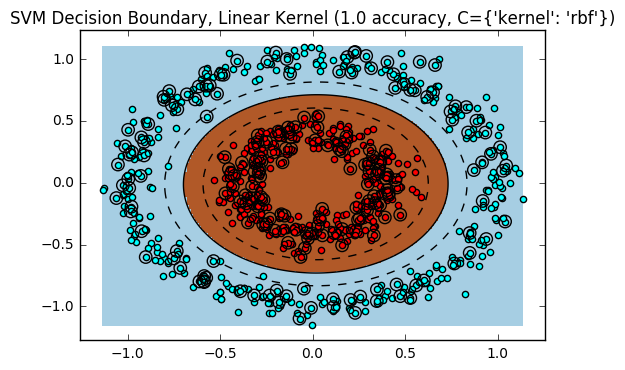

In [8]:
# take a look at the decision boundary (-2-)
acc = len(np.where(pred == y_test)[0]) / float(len(pred))
plot_svm(clf.best_estimator_, X, y, X_test, y_test, 
             title="SVM Decision Boundary, Linear Kernel ({0} accuracy, C={1})".format(acc, clf.best_params_))


# References

(-1-) https://www.youtube.com/watch?v=l7Tr2OyXNU81

(-2-) http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html

(-3-) https://www.youtube.com/watch?v=3liCbRZPrZA

(-4-) https://en.wikipedia.org/wiki/Kernel_method

(-5-) https://en.wikipedia.org/wiki/Polynomial_kernel

(-6-) https://www.youtube.com/watch?v=9NrALgHFwTo